**Name:** Shivam Panchal  
**Company:** Shack Labs  
**Position:** Data Science Internship


# Problem Statement

- The goal is to understand the relationship between house features and how these variables affect the house price.


## Importing Libraries


In [4]:
# %pip install sklearn pandas numpy plotly seaborn matploblib catboost xgboost


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"
sns.set_theme(style="darkgrid", font_scale=1.4)


## Importing Data


In [6]:
FILE_PATH = "./DS - Assignment Part 1 data set.xlsx"
dataset = pd.read_excel(FILE_PATH)
dataset.head()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


**OBSERVATION**

- Target = `House price of unit area`


## Dataset Summary


In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [8]:
dataset.describe()


,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [9]:
print(f"Are there any Null Values? {dataset.isna().sum().any()}")


Are there any Null Values? False


In [10]:
print(f"Are there any Duplicate Entries? {dataset.duplicated().any()}")


Are there any Duplicate Entries? False


**OBSERVATION**

- Dataset has **no null values**.
- Dataset has **no duplicate entries**.
- Dataset does not contain any **categorical feature**.
- `Transaction date` is **Temporal feature** but it is ambiguous for month and day.

**TODO**

- Extract `Year` from `Transaction date` which will remove ambiguous format of month and day.


## Extract `Year` from `Transaction date`


In [11]:
data = dataset.copy()
data["Transaction_year"] = pd.to_datetime(data["Transaction date"], format="%Y").dt.year
data.drop("Transaction date", axis=1, inplace=True)
data.head()


,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,Transaction_year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


**OBSERVATION**

- `Year` is extracted from `Transaction date`

**TODO**

- Rename column names to short names


## Renaming column names


In [12]:
df = data.copy()

column_map = {
    "House Age": "house_age",
    "Distance from nearest Metro station (km)": "metro_dist",
    "Number of convenience stores": "n_conv_store",
    "latitude": "lat",
    "longitude": "long",
    "Number of bedrooms": "n_bedrooms",
    "House size (sqft)": "house_size",
    "House price of unit area": "house_price_unit_area",
    "Transaction_year": "transaction_year",
}
df.rename(columns=column_map, inplace=True)
df.head()


,house_age,metro_dist,n_conv_store,lat,long,n_bedrooms,house_size,house_price_unit_area,transaction_year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


**OBSERVATION**

- Target = `house_price_unit_area`


## EDA


### Correlation Plot


In [13]:
def plot_corr(corr_data: pd.DataFrame) -> plt.Axes:
    """Return correlation plot

    Args:
        corr_data (pd.DataFrame): Correlation Dataframe

    Returns:
        plt.Axes: correlation plot axes
    """
    plt.figure(figsize=(15, 10))
    mask = np.triu(np.ones_like(corr_data))
    ax = sns.heatmap(
        corr_data,
        mask=mask,
        fmt=".2f",
        annot=True,
        linewidths=0.5,
        vmin=-1,
        vmax=1,
        cmap=sns.diverging_palette(20, 220, as_cmap=True),
        square=True,
        # cmap="PuOr",
        center=0,
        lw=1,
        linecolor="k",
    )
    ax.set_title("Correlation Plot")
    return ax


<AxesSubplot:title={'center':'Correlation Plot'}>

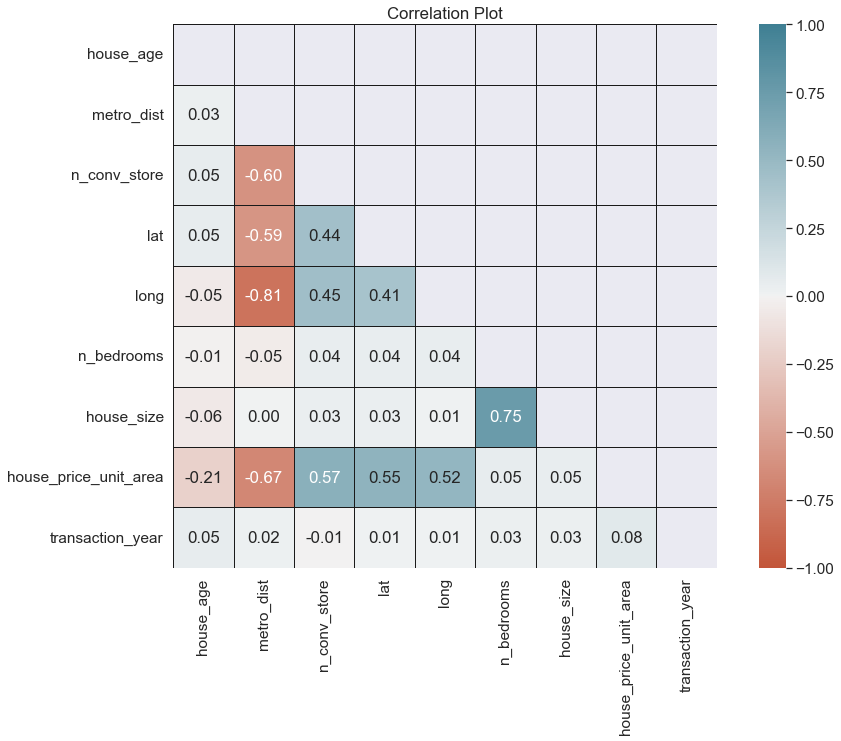

In [14]:
plot_corr(df.corr())


**OBSERVATION**

- `long` is negatively correlated with `metro_dist` i.e. `-0.81`.
  - Area falling under specific longitude could define development level of that area i.e. area falling under longitude would be developed or undeveloped regions.
- `house_size` is positively correlation with `n_bedrooms`.
- `metro_dist` is negatively correlated with `house_price_unit_area` and is having highest correlated index among other feature.
- `lat`, `long` and `n_conv_store` are moderately correlated with `house_price_unit_area`.
- `n_bedrooms` is not correlated with `house_price_unit_area`.
- `house_size` is not correlated with `house_price_unit_area` because price is provided per unit area.
  - If we create new column as `house_price` i.e. $\text{house\_size} \times \text{house\_price\_unit\_area}$ it will become highly correlated with `house_size` as it's multiple of it.

**CONCLUSION**

- No feature is highly correlated with each other.
- No need to drop feature due to collinearity. (For linear statistical models)
- We can drop feature which are less(negligible) correlated (significant contribution) with `house_price_unit_area`


### Outlier


In [15]:
px.box(df, title="Boxplots")  # .update_traces(marker_outliercolor='red')


**OBSERVATION**

- `metro_dist` has outliers.
- Other feature do not show any significant outliers.


### Outlier analysis


In [16]:
px.scatter(df, x="house_price_unit_area", y="metro_dist", title="metro_dist VS house_price_unit_area")


**OBSERVATION**

- From scatter plot we found data point with `metro_dist=252.5822` has `house_price_unit_area=117.5` which is isolated (suspected outlier).


In [17]:
def detect_outliers_iqr(data: pd.Series) -> tuple:
    """Detect outlier from given pandas series

    Args:
        data (pd.Series): Series to detect outliers

    Returns:
        tuple: outliers list, no. of outliers, percentage of outliers
    """
    outliers = []
    q1, q3 = data.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return sorted(outliers), len(outliers), len(outliers) / data.shape[0] * 100


sample_outliers, n_outlier, p_outlier = detect_outliers_iqr(df["metro_dist"])
print(f"Outliers from IQR method: {sample_outliers}\nn outlier: {n_outlier}\n% outlier: {p_outlier:.3f}")


Outliers from IQR method: [3529.564, 3771.895, 3780.59, 3947.945, 4066.587, 4066.587, 4066.587, 4066.587, 4066.587, 4066.587, 4074.736, 4079.418, 4082.015, 4082.015, 4082.015, 4082.015, 4082.015, 4082.015, 4082.015, 4136.271, 4197.349, 4197.349, 4197.349, 4412.765, 4449.27, 4510.359, 4510.359, 4519.69, 4519.69, 4527.687, 4573.779, 4605.749, 5512.038, 5512.038, 6306.153, 6396.283, 6488.021]
n outlier: 37
% outlier: 8.937


**OBSERVATION**

- 8.94% of data is detected as outlier which is high compare to total data (414)
- From scatter plot, outlier points(large `metro_dist`) has less `house_price_unit_area` compare to points within range.
- From correlation plot it's evident that `metro_dist` has negative correlation with `house_pice_unit_area` which supports that `metro_dist` outliers are playing significant role which is logically also correct.

**CONCLUSION**

- No need to drop Outlier as we have less data.
- Outlier relation with `house_price_unit_area` is logically correct which solidifies our conclusion.


### Temporal Feature


In [18]:
temporal_feature = ["transaction_year"]
temporal_feature


['transaction_year']

In [19]:
for feature in temporal_feature:
    print(f"{feature}: {df[feature].unique()}")


transaction_year: [2012 2013]


In [20]:
df.groupby(temporal_feature)["house_price_unit_area"].describe()


,count,mean,std,min,25%,50%,75%,max
transaction_year,,,,,,,,
2012,126.0,36.304762,12.484915,11.6,25.975,37.60,45.375,71.0
2013,288.0,38.713194,14.026954,7.6,28.700,39.05,47.025,117.5


**OBSERVATION**

- There are double data points in 2013 than 2012.
- `house_price_unit_area` has increase by 1.5 units for 2013 compare to 2012.


### Numerical Feature


In [21]:
target = "house_price_unit_area"


#### Discrete Feature


In [22]:
discrete_feature = [col for col in df.columns if df[col].nunique() < 30 and col not in temporal_feature]
discrete_feature


['n_conv_store', 'n_bedrooms']

In [23]:
for feature in discrete_feature:
    px.bar(
        df.groupby(feature)[target].median(),
    ).update_layout(showlegend=False, xaxis_title=feature, yaxis_title="house_price_unit_area").show()


**OBSERVATION**

- `n_bedrooms` does not affect much on `house_price_unit_area`, same as seen in correlation plot.
- As `n_conv_store` is increased `house_price_unit_area` is also increasing.


#### Continuous Feature


In [24]:
continuous_feature = [col for col in df.columns if col not in [*discrete_feature, target]]
continuous_feature


['house_age', 'metro_dist', 'lat', 'long', 'house_size', 'transaction_year']

In [25]:
for feature in continuous_feature:
    px.histogram(df[feature], marginal="rug",).update_traces(
        marker_line_width=0.5, marker_line_color="white", showlegend=False
    ).update_layout(xaxis_title="house_price_unit_area", yaxis_title=feature).show()


**OBSERVATION**

- Feature are mostly normally distributed
- `metro_dist` is right skewed


In [26]:
px.histogram(x=np.log(df["metro_dist"])).update_layout(xaxis_title="metro_dist (log)")


**OBSERVATION**

- Taking `log` of `metro_dist` and plotting histogram depicts normal distribution.


In [27]:
# wrt house_price_unit_area
for feature in continuous_feature:
    px.histogram(df.groupby(feature)[target].median(), marginal="rug").update_traces(
        marker_line_width=0.5, marker_line_color="white", showlegend=False
    ).update_layout(xaxis_title="house_price_unit_area", yaxis_title=feature).show()


**OBSERVATION**

- Continuous feature wrt `house_price_unit_area` is showing Normal or uniform distribution with exception of 1 Outlier.


## Regression Modelling


### Importing Miscellaneous libraries


In [28]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error


### Importing Model Libraries


In [29]:
from sklearn.linear_model import (
    LinearRegression,
    ElasticNet,
    Ridge,
    Lasso,
)  # // can use CV of regularization model but not using due to GridSearchCV approach
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


c:\Users\GodWin\anaconda3\envs\fsds\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



### Feature and Target


In [30]:
target


'house_price_unit_area'

In [31]:
feature = [col for col in df.columns if col != target]
feature


['house_age',
 'metro_dist',
 'n_conv_store',
 'lat',
 'long',
 'n_bedrooms',
 'house_size',
 'transaction_year']

### Splitting Dataset

- To prevent data leakage
- To validate/test against dataset never seen before during training


In [32]:
X_train, X_test, y_train, y_test = train_test_split(df[feature], df[target], test_size=0.2, random_state=64)


In [33]:
X_train


,house_age,metro_dist,n_conv_store,lat,long,n_bedrooms,house_size,transaction_year
7,20.3,287.6025,6,24.98042,121.54228,3,1316,2013
235,12.9,250.6310,7,24.96606,121.54297,2,1035,2012
186,20.9,2185.1280,3,24.96322,121.51237,1,436,2013
127,3.8,383.8624,5,24.98085,121.54391,2,1136,2013
277,21.2,2185.1280,3,24.96322,121.51237,3,1318,2013
...,...,...,...,...,...,...,...,...
85,0.0,338.9679,9,24.96853,121.54413,2,1145,2012
307,10.3,3079.8900,0,24.95460,121.56627,2,812,2012
54,16.1,289.3248,5,24.98203,121.54348,2,1193,2013
166,0.0,292.9978,6,24.97744,121.54458,3,1448,2013


In [34]:
y_train


7      46.7
235    39.3
186    25.7
127    55.0
277    27.7
       ... 
85     50.8
307    24.7
54     51.7
166    73.6
119    59.6
Name: house_price_unit_area, Length: 331, dtype: float64

### Model Evaluator

- **Preprocessing**
  - Applying standard scaler on feature to standardize values to same scale across all features.
    - We can apply to all feature except `n_conv_store` and `n_bedrooms` if we consider it as explicitly ordinal but it won't affect much.
  - Preprocessing only on `Training Dataset`.
- **Model**
  - Different Regression model will be used to evaluate.
  - $R^2$ Score will be used to compare across different models.
    - Adj. $R^2$ can be used for penalizing no. of feature but we have less feature it will be okay in this case and will decrease computation to ome extent.
  - `GridSearchCV` will be used for hyperparameter tuning of each model.


In [35]:
class ModelEvaluate:
    __model_names = []
    __model_report = []

    def __init__(self, model_obj, model_name: str):
        self.__unique_model_name(model_name)
        self.model_obj = model_obj
        self.model_name = model_name
        self.gscv = None
        self.pipe = None
        self.scaler = StandardScaler()

    def initialize_gscv(
        self, params: dict, *, scoring: str = "r2", cv: int = 5
    ):  # using r2 as it's easy to compare between different models
        """Initialize Grid Search CV Object

        Args:
            params (dict): parameter of model object for hyperparameter tuning
            scoring (str, optional): Scoring string. Defaults to "r2".
            cv (int, optional): No. of iteration in cross validation. Defaults to 5.
        """
        self.gscv = GridSearchCV(
            self.model_obj, param_grid=params, scoring=scoring, cv=cv, refit=False, verbose=1
        )  # refit=False means it will not fit the model with best perimeter,
        # i.e. we cannot use score or predict method, it's advisable to use it only when you want to calculate score

    def initialize_pipeline(self):
        """Initialize Pipeline with preprocessor obj and gscv obj"""
        self.pipe = Pipeline(steps=[("std_scaler", self.scaler), ("gscv", self.gscv)])

    def fit_pipeline(self, X: pd.DataFrame, y: pd.Series) -> dict:
        """Train the pipeline on `X` and `y`

        Args:
            X (pd.DataFrame): Features
            y (pd.Series): Target

        Returns:
            dict: Returns best score and best parameter
        """
        self.pipe.fit(X, y)
        self.__model_report.append(
            {"Model Name": self.model_name, "Best Score (R2)": self.pipe.named_steps["gscv"].best_score_}
        )
        return self.get_best()

    def get_best(self) -> dict:
        """Returns best score and best parameter

        Returns:
            dict: best score and best parameter
        """
        return {"score": self.pipe.named_steps["gscv"].best_score_, "param": self.pipe.named_steps["gscv"].best_params_}

    def __unique_model_name(self, model_name: str):
        if model_name in self.__model_names:
            raise Exception(f"{model_name} already exists. model_name should be unique.")
        self.__model_names.append(model_name)

    @staticmethod
    def get_model_names() -> list:
        """Return list of existing model names

        Returns:
            list: model names
        """
        return ModelEvaluate.__model_names

    @staticmethod
    def get_model_report() -> pd.DataFrame or str:
        """Returns model report with Model Name and Best Score

        Returns:
            pd.DataFrame or str: Model report
        """
        if ModelEvaluate.__model_report:
            return pd.DataFrame(ModelEvaluate.__model_report)
        return "No Model Evaluated"


#### Linear Regression


In [36]:
linear_param = {}
linear_regressor = ModelEvaluate(LinearRegression(), "linear regression")
linear_regressor.initialize_gscv(linear_param)
linear_regressor.initialize_pipeline()
linear_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'score': 0.5719709277593429, 'param': {}}

**OBSERVATION**

- Does not perform well as feature is not linearly related with target (skewed and outlier)


#### Lasso Regression


In [37]:
lasso_param = {
    "alpha": [1e-3, 1e-2, 3e-2, 4e-2, 5e-2, 8e-2, 1e-1, 0.5, 0.8, 1, 1.2, 1.5, 1.8, 2],
    "random_state": [48, 64],
}
lasso_regressor = ModelEvaluate(Lasso(), "lasso regression")
lasso_regressor.initialize_gscv(lasso_param)
lasso_regressor.initialize_pipeline()
lasso_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


{'score': 0.5793037794381211, 'param': {'alpha': 0.5, 'random_state': 48}}

**OBSERVATION**

- Does not perform well as feature is not linearly related with target (skewed and outlier)


#### Ridge Regression


In [38]:
ridge_param = {"alpha": np.arange(0.1, 50, 3.5), "random_state": [48, 64]}
ridge_regressor = ModelEvaluate(Ridge(), "ridge regression")
ridge_regressor.initialize_gscv(ridge_param)
ridge_regressor.initialize_pipeline()
ridge_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'score': 0.5735439968721764, 'param': {'alpha': 17.6, 'random_state': 48}}

**OBSERVATION**

- Does not perform well as feature is not linearly related with target (skewed and outlier)


#### ElasticNet Regression


In [39]:
elasticNet_param = {
    "alpha": [*lasso_param["alpha"], *ridge_param["alpha"]],
    "l1_ratio": np.arange(0.3, 1, 0.1),
    "random_state": [48, 64],
}
elasticNet_regressor = ModelEvaluate(ElasticNet(), "elasticNet regression")
elasticNet_regressor.initialize_gscv(elasticNet_param)
elasticNet_regressor.initialize_pipeline()
elasticNet_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 406 candidates, totalling 2030 fits


{'score': 0.5780248733325916,
 'param': {'alpha': 0.1, 'l1_ratio': 0.9000000000000001, 'random_state': 48}}

**OBSERVATION**

- Does not perform well as feature is not linearly related with target (skewed and outlier)


#### Decision Tree Regression


In [40]:
decision_tree_param = {
    "criterion": ["squared_error", "absolute_error", "poisson"],
    "max_depth": [None, 2, 3, 4],
    "min_samples_leaf": [3, 5, 8, 10],
    "max_features": [None, "log2", "sqrt"],
    "random_state": [48, 64],
}
decision_tree_regressor = ModelEvaluate(DecisionTreeRegressor(), "decision tree regression")
decision_tree_regressor.initialize_gscv(decision_tree_param)
decision_tree_regressor.initialize_pipeline()
decision_tree_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'score': 0.663103206163574,
 'param': {'criterion': 'absolute_error',
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 3,
  'random_state': 48}}

**OBSERVATION**

- Requires more amount of data to find pattern and do better split.
- Prone to overfitting


#### Random Forest Regression


In [41]:
random_forest_param = {
    "n_estimators": np.arange(50, 201, 50),
    "criterion": ["squared_error"],
    "max_depth": [None, 2, 5],
    "min_samples_leaf": [3, 8],
    "max_features": [None, "log2", "sqrt"],
    "random_state": [64],
}
random_forest_regressor = ModelEvaluate(RandomForestRegressor(), "random forest regression")
random_forest_regressor.initialize_gscv(random_forest_param)
random_forest_regressor.initialize_pipeline()
random_forest_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'score': 0.7085029553168807,
 'param': {'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 'log2',
  'min_samples_leaf': 3,
  'n_estimators': 200,
  'random_state': 64}}

**OBSERVATION**

- Requires more amount of data to find optimal criteria for split.
- Prone to overfitting.
- Performs well compare to Decision Tree due to Ensemble Technique (Bagging).


#### AdaBoost Regression


In [42]:
ada_boost_param = {
    "n_estimators": np.arange(50, 201, 50),
    "learning_rate": [0.1, 0.5],
    "loss": ["linear", "square", "exponential"],
    "random_state": [48],
}
ada_boost_regressor = ModelEvaluate(AdaBoostRegressor(), "ada boost regression")
ada_boost_regressor.initialize_gscv(ada_boost_param)
ada_boost_regressor.initialize_pipeline()
ada_boost_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'score': 0.6553149136087062,
 'param': {'learning_rate': 0.1,
  'loss': 'square',
  'n_estimators': 200,
  'random_state': 48}}

**OBSERVATION**

- Requires more amount of data to learn hidden pattern and relation.
- Performs well compare to Decision Tree due to Ensemble Technique (Boosting).


#### XGBoost Regression


In [43]:
xg_boost_param = {
    "n_estimators": np.arange(50, 201, 50),
    "max_depth": [2, 5],
    "learning_rate": [0.1, 0.5, 1],
    "random_state": [64],
}
xg_boost_regressor = ModelEvaluate(XGBRegressor(), "xg boost regression")
xg_boost_regressor.initialize_gscv(xg_boost_param)
xg_boost_regressor.initialize_pipeline()
xg_boost_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'score': 0.6854628336356724,
 'param': {'learning_rate': 0.1,
  'max_depth': 2,
  'n_estimators': 50,
  'random_state': 64}}

**OBSERVATION**

- Requires more amount of data to learn hidden pattern and relation.
- Performs well compare to Decision Tree due to Ensemble Technique (Boosting).


#### CATBoost Regression


In [44]:
cat_boost_param = {
    "iterations": [50, 100, 200],
    "depth": [2, 3, 5, 6],
    "learning_rate": [0.1, 0.3, 0.5, 0.8, 1],
    "random_seed": [48, 64],
    "verbose": [False],
}
cat_boost_regressor = ModelEvaluate(CatBoostRegressor(), "cat boost regression")
cat_boost_regressor.initialize_gscv(cat_boost_param)
cat_boost_regressor.initialize_pipeline()
cat_boost_regressor.fit_pipeline(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'score': 0.6945343343046028,
 'param': {'depth': 3,
  'iterations': 50,
  'learning_rate': 0.1,
  'random_seed': 64,
  'verbose': False}}

**OBSERVATION**

- Requires more amount of data to learn hidden pattern and relation.
- Performs well compare to Decision Tree due to Ensemble Technique (Boosting).
- CATBoost algorithm does hyperparameter tuning in it's own algorithm itself and stores previous iteration for faster computation in next iteration.


In [45]:
ModelEvaluate.get_model_report().sort_values("Best Score (R2)", ascending=False)


,Model Name,Best Score (R2)
5,random forest regression,0.708503
8,cat boost regression,0.694534
7,xg boost regression,0.685463
4,decision tree regression,0.663103
6,ada boost regression,0.655315
1,lasso regression,0.579304
3,elasticNet regression,0.578025
2,ridge regression,0.573544
0,linear regression,0.571971


**OBSERVATION**

- $r^2$ score of `random forest`, `cat boost regressor` and `xg boost regressor` are close.
- Classic regression model did not perform well.

**TODO**

- Calculate `RMSE` of three models and decide final model based on `RMSE`.


#### Final Evaluation


In [46]:
class RMSE_Model:
    __model_names = []
    __model_rmse = []

    def __init__(self, model_obj, model_name):
        self.__unique_model_name(model_name)
        self.model_obj = model_obj
        self.model_name = model_name

    def fit_model(self, X: pd.DataFrame = X_train, y: pd.Series = y_train):
        """Train model with `X` features against `y` target

        Args:
            X (pd.DataFrame, optional): Feature. Defaults to X_train.
            y (pd.Series, optional): Target. Defaults to y_train.
        """
        self.model_obj.fit(X, y)

    def calc_rmse(self, X: pd.DataFrame = X_test, y: pd.Series = y_test) -> float:
        """Calculate rmse of model given `X` and `y`

        Args:
            X (pd.DataFrame, optional): Feature. Defaults to X_test.
            y (pd.Series, optional): Target. Defaults to y_test.

        Returns:
            float: RMSE value
        """
        rmse = mean_squared_error(y_true=y, y_pred=self.model_obj.predict(X), squared=False)
        self.__model_rmse.append({"Model Name": self.model_name, "RMSE": rmse})
        return rmse

    def __unique_model_name(self, model_name: str):
        if model_name in self.__model_names:
            raise Exception(f"{model_name} already exists. model_name should be unique.")
        self.__model_names.append(model_name)

    @staticmethod
    def get_model_names() -> list:
        """Return list of existing model names

        Returns:
            list: model names
        """
        return RMSE_Model.__model_names

    @staticmethod
    def get_RMSE_report() -> pd.DataFrame or str:
        """Return Model name and it's rmse score

        Returns:
            pd.DataFrame or str: Model name and rmse score
        """
        if RMSE_Model.__model_rmse:
            return pd.DataFrame(RMSE_Model.__model_rmse)
        return "No Model Evaluated"


In [47]:
# Random Forest Regressor
final_random_forest = RMSE_Model(
    RandomForestRegressor(**random_forest_regressor.gscv.best_params_), "Random Forest Regressor"
)
final_random_forest.fit_model()
final_random_forest.calc_rmse()

# CatBoost Regressor
final_catboost = RMSE_Model(CatBoostRegressor(**cat_boost_regressor.gscv.best_params_), "CatBoost Regressor")
final_catboost.fit_model()
final_catboost.calc_rmse()

# XgBoost Regressor
final_xg_boost = RMSE_Model(XGBRegressor(**xg_boost_regressor.gscv.best_params_), "XgBoost Regressor")
final_xg_boost.fit_model()
final_xg_boost.calc_rmse()

RMSE_Model.get_RMSE_report()


c:\Users\GodWin\anaconda3\envs\fsds\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



,Model Name,RMSE
0,Random Forest Regressor,6.876381
1,CatBoost Regressor,7.273574
2,XgBoost Regressor,7.567613


**OBSERVATION**

- `Random Forest Regressor` has lower `RMSE` value compare to other models.

**CONCLUSION**

- Ensemble Model requires sufficiently large amount of training data to detect pattern and tune it's parameter.
- Linear statistical model requires linear relationship among independent feature and dependent target.
- Naive Bayes model works well with categorical feature, this dataset does not have any categorical feature hence it was not trained.
- We can select `Random Forest Regressor`, but there are high chances model is over-fitted due to less data and it's fully grown.
- We can select any one from final three model if we have sufficient data to train we can see one of this model outperforming other models.
